In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
file=pd.read_csv("../Database/ready_for_sql/final_df.csv")
df=file.copy()
df.head()

,channel_id,custom_url,topic_category,channel_view_count,subscriber_count,channel_video_count,video_id,video_length,like_count,comment_count,view_count,day_of_week_published,date_published,time_published
0,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,lmH5uqwaFq8,2:59,19653,0,3425275,Tuesday,2022-11-01,07:00:15
1,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,0SY0Yn0yF9o,29:52:00,15076,0,2882582,Saturday,2022-10-29,07:00:00
2,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,sNyF7BvVfxs,2:49,47763,0,8673081,Tuesday,2022-10-25,07:00:16
3,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,K4kqqCzF-BA,1:01:21,57936,0,11744611,Saturday,2022-10-22,07:00:12
4,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,gfZmvllWVwY,2:39,46041,0,8775011,Tuesday,2022-10-18,07:00:19


In [53]:
#make new column that has binary classification. if view count is greather than 1,000,000 then add 1 if less than add 0
def viral(row):
    if row['view_count'] > 1000000:
        return 1
    else:
        return 0

In [54]:
#add the viral column 
df['viral']=df.apply(lambda row: viral(row), axis=1)
df.sample(5)

,channel_id,custom_url,topic_category,channel_view_count,subscriber_count,channel_video_count,video_id,video_length,like_count,comment_count,view_count,day_of_week_published,date_published,time_published,viral
3073,UC6107grRI4m0o2-emgoDnAA,@smartereveryday,Technology,1074535210,10600000,359,o0fG_lnVhHw,54:16:00,247066,14903,11581509,Saturday,2020-02-29,19:25:15,1
6515,UCL-yKZ_kCuKBHyeRfePpvuw,@educationweek,Society,14216746,34900,1152,E68yPb0v1eQ,4:23,27,0,3979,Wednesday,2021-11-17,18:49:09,0
2149,UCBINFWq52ShSgUFEoynfSwg,@popsugarfitness,Physical_fitness,942939712,6020000,1563,5x2wen8ciRo,14:24,922,17,38764,Wednesday,2022-08-17,16:00:08,0
2272,UCGMOauU8dOd4mv2bT3Tx57w,@gurumannfitness,Physical_fitness,170350424,2350000,411,n-E8GcgZYec,10:50,2050,196,34009,Wednesday,2022-05-11,12:00:24,0
690,UC0VOyT2OCBKdQhF3BAbZ-1g,@arianagrandevevo,Music,19286274611,110400000,250,rFA11HZu-RU,2:05,234842,13509,7152965,Friday,2021-02-19,05:00:11,1


In [55]:
#remove columns not needed for ml
df=df.drop(['channel_id','custom_url','video_id','date_published','time_published','video_length','view_count'],axis=1)
df.sample(5)

,topic_category,channel_view_count,subscriber_count,channel_video_count,like_count,comment_count,day_of_week_published,viral
2700,Knowledge,984667385,4420000,1011,4661,258,Sunday,0
5825,Music,54572,728,134,2,0,Wednesday,0
3270,Entertainment,1020971516,4400000,1908,2738,113,Wednesday,0
5793,Music,442176,1060,34,44,7,Friday,0
3658,Society,9745936107,14400000,179447,236,2,Thursday,0


Preprocess Data- scale, encode, resample

In [6]:
#shape of df
print("shape of dataframe is: ", df.shape)

#statistical details of data
df.describe()

shape of dataframe is:  (8603, 8)


,channel_view_count,subscriber_count,channel_video_count,like_count,comment_count,viral
count,8.603000e+03,8.603000e+03,8603.000000,8.603000e+03,8603.000000,8603.000000
mean,6.968476e+09,1.619056e+07,6394.306405,8.607448e+04,3962.790306,0.212252
std,1.738611e+10,2.970128e+07,27296.898994,4.460045e+05,21021.855427,0.408926
min,7.910000e+02,1.600000e+01,2.000000,0.000000e+00,0.000000,0.000000
25%,1.273273e+06,7.230000e+03,165.000000,2.900000e+01,3.000000,0.000000
50%,5.132332e+08,2.640000e+06,427.000000,1.363000e+03,62.000000,0.000000
75%,4.315880e+09,1.450000e+07,1406.000000,2.006650e+04,835.000000,0.000000
max,1.424682e+11,1.460000e+08,246686.000000,1.451987e+07,728578.000000,1.000000


In [7]:
#null
df.isnull().sum()

topic_category           0
channel_view_count       0
subscriber_count         0
channel_video_count      0
like_count               0
comment_count            0
day_of_week_published    0
viral                    0
dtype: int64

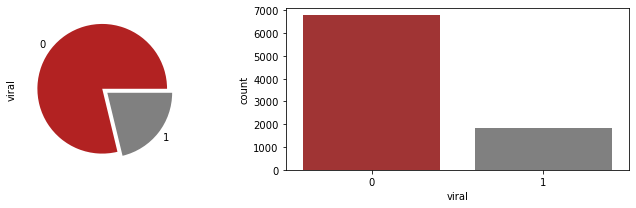

In [8]:
#chart target variables distribution- color #8C000F
fig=plt.figure(figsize=(10,3))
fig.add_subplot(1,2,1)
colors=['firebrick','gray']
explode=(0,.1)
a=df["viral"].value_counts(normalize=True).plot
a.pie(explode=explode,colors=colors)
fig.add_subplot(1,2,2)
chart=sns.countplot(x=df["viral"],palette=colors)

plt.tight_layout()
plt.show()

In [9]:
#percentage viral/not viral
print("Viral: ", df.viral.value_counts()[1]/len(df)*100,"%")
print("Not Viral: ", df.viral.value_counts()[0]/len(df)*100,"%")

Viral:  21.225154016040914 %
Not Viral:  78.77484598395908 %


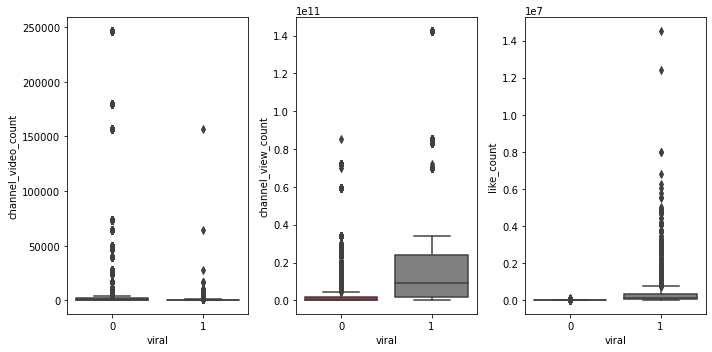

In [10]:
#visualize relationship between viral and other features
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,3,1)
b=sns.boxplot(x=df['viral'],y=df['channel_video_count'],palette=colors)
fig.add_subplot(1,3,2)
b=sns.boxplot(x=df['viral'],y=df['channel_view_count'],palette=colors)
fig.add_subplot(1,3,3)
sns.boxplot(x=df['viral'],y=df['like_count'],palette=colors)
plt.tight_layout()
plt.show()


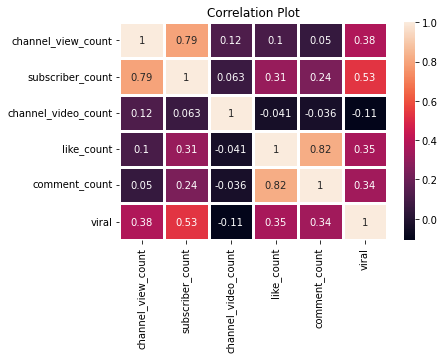

In [11]:
#correlation between features
corr_plot=sns.heatmap(df.corr(),annot=True, linewidths=3)
plt.title("Correlation Plot")
plt.show()

In [12]:
df.head()

,topic_category,channel_view_count,subscriber_count,channel_video_count,like_count,comment_count,day_of_week_published,viral
0,Music,142468175305,146000000,811,19653,0,Tuesday,1
1,Music,142468175305,146000000,811,15076,0,Saturday,1
2,Music,142468175305,146000000,811,47763,0,Tuesday,1
3,Music,142468175305,146000000,811,57936,0,Saturday,1
4,Music,142468175305,146000000,811,46041,0,Tuesday,1


In [56]:
#encode categorical data
le = LabelEncoder()
df2 = df.copy()
df2['topic_category'] = le.fit_transform(df2['topic_category'])
df2['day'] = le.fit_transform(df2['day_of_week_published'])
df2.sample(5)


,topic_category,channel_view_count,subscriber_count,channel_video_count,like_count,comment_count,day_of_week_published,viral,day
7493,10,1273273,5310,617,17,1,Thursday,0,4
4959,11,151941207,1020000,1266,192,24,Wednesday,0,6
3573,6,2997561451,10900000,1428,23319,2062,Tuesday,0,5
3035,12,1074535210,10600000,359,30991,960,Friday,0,0
8570,3,184778,829,109,10,5,Sunday,0,3


In [57]:
# Day of Week dictionary
weekday_num = {
    "Sunday": 1,
    "Monday": 2,
    "Tuesday": 3,
    "Wednesday": 4,
    "Thursday": 5,
    "Friday": 6,
    "Saturday": 7
}

In [58]:
# weekdays names encoded using the dictionary values
df2["day_of_week"] = df2["day_of_week_published"].apply(lambda x: weekday_num[x])
df2=df2.drop(columns=['day','day_of_week_published'])
df2.head()

,topic_category,channel_view_count,subscriber_count,channel_video_count,like_count,comment_count,viral,day_of_week
0,7,142468175305,146000000,811,19653,0,1,3
1,7,142468175305,146000000,811,15076,0,1,7
2,7,142468175305,146000000,811,47763,0,1,3
3,7,142468175305,146000000,811,57936,0,1,7
4,7,142468175305,146000000,811,46041,0,1,3


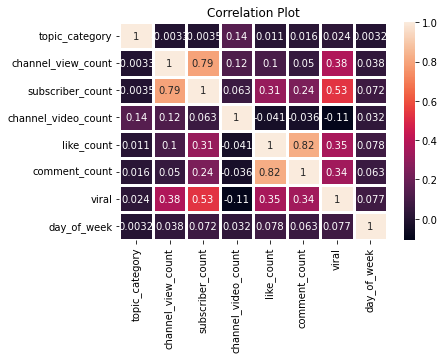

In [59]:
#correlation between features
corr_plot=sns.heatmap(df2.corr(),annot=True, linewidths=3)
plt.title("Correlation Plot")
plt.show()

Scaling

In [16]:
#seperate features and target
y=df2['viral']
X=df2.drop(columns='viral')

In [17]:
X.head()

,topic_category,channel_view_count,subscriber_count,channel_video_count,like_count,comment_count,day_of_week
0,7,142468175305,146000000,811,19653,0,3
1,7,142468175305,146000000,811,15076,0,7
2,7,142468175305,146000000,811,47763,0,3
3,7,142468175305,146000000,811,57936,0,7
4,7,142468175305,146000000,811,46041,0,3


In [18]:
stds=StandardScaler()
df_scaled=stds.fit_transform(X.to_numpy())
df_scaled=pd.DataFrame(df_scaled,columns=['topic_category','channel_view_count','subscriber_count','channel_video_count','like_count','comment_count','day_of_week'])

df_scaled.head()

,topic_category,channel_view_count,subscriber_count,channel_video_count,like_count,comment_count,day_of_week
0,0.21331,7.794011,4.370754,-0.204552,-0.148934,-0.188519,-0.613740
1,0.21331,7.794011,4.370754,-0.204552,-0.159197,-0.188519,1.578497
2,0.21331,7.794011,4.370754,-0.204552,-0.085904,-0.188519,-0.613740
3,0.21331,7.794011,4.370754,-0.204552,-0.063094,-0.188519,1.578497
4,0.21331,7.794011,4.370754,-0.204552,-0.089765,-0.188519,-0.613740


Resample Data

In [19]:
#seperate features and target
y=df2['viral']
X=df_scaled

In [20]:
#split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(6452, 7)

In [21]:
y.value_counts()

0    6777
1    1826
Name: viral, dtype: int64

In [22]:
from imblearn.combine import SMOTEENN
from collections import Counter

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({0: 6451, 1: 6366})

Logistic Regression

In [42]:
#BEFORE RESAMPLING
#create logistic regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

#fit train the model
classifier.fit(X_train, y_train)
#make predictions
y_pred = classifier.predict(X_test)
#accuracy score
print("Accuracy Score: ",accuracy_score(y_test, y_pred))


Accuracy Score:  0.9488609948860995


In [43]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1680,   14],
       [  96,  361]])

In [44]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1694
           1       0.96      0.79      0.87       457

    accuracy                           0.95      2151
   macro avg       0.95      0.89      0.92      2151
weighted avg       0.95      0.95      0.95      2151



In [23]:
#create logistic regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

#fit train the model
classifier.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=200, random_state=1)

In [24]:
#make predictions
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,0
9,0,0


In [25]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.9539748953974896


In [27]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1631,   63],
       [  36,  421]])

In [28]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1694
           1       0.87      0.92      0.89       457

    accuracy                           0.95      2151
   macro avg       0.92      0.94      0.93      2151
weighted avg       0.96      0.95      0.95      2151



Random Forest Classifier


In [29]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

In [30]:
#pip install 
#%pip install imbalanced-learn==0.9.0
#%pip install scikit-learn==1.0

In [45]:
#BEFORE RESAMPLING
# Create a random forest classifier
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
model.fit(X_train, y_train)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("Accuracy Score: ", balanced_accuracy_score(y_test,y_pred))

Accuracy Score:  0.9700468121494579


In [46]:
# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1694
           1       0.89      0.97      0.93       457

    accuracy                           0.97      2151
   macro avg       0.94      0.97      0.95      2151
weighted avg       0.97      0.97      0.97      2151



In [47]:
# List the features sorted in descending order by feature importance
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.4956314070603417, 'like_count'),
 (0.18758883148965227, 'comment_count'),
 (0.11188914380045174, 'subscriber_count'),
 (0.10249570056339609, 'channel_view_count'),
 (0.06270051475775136, 'channel_video_count'),
 (0.0234488363920342, 'topic_category'),
 (0.016245565936372698, 'day_of_week')]

In [33]:
# Create a random forest classifier
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

BalancedRandomForestClassifier(random_state=1)

In [34]:
# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
balanced_accuracy_score(y_test,y_pred)

0.9774257968011697

In [35]:
# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1694
           1       0.93      0.97      0.95       457

    accuracy                           0.98      2151
   macro avg       0.96      0.98      0.97      2151
weighted avg       0.98      0.98      0.98      2151



In [36]:
# List the features sorted in descending order by feature importance
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.5087001150346812, 'like_count'),
 (0.19153776410912765, 'comment_count'),
 (0.11684245155319044, 'subscriber_count'),
 (0.0911579778379475, 'channel_view_count'),
 (0.06393489936816082, 'channel_video_count'),
 (0.020181369871470057, 'topic_category'),
 (0.007645422225422378, 'day_of_week')]

In [37]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1662,   32],
       [  12,  445]])

Easy Ensemble Classifier

In [48]:
#BEFORE RESAMPLING
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

model_eec=EasyEnsembleClassifier(n_estimators=100, random_state=1)
model_eec.fit(X_train, y_train)

# Calculated the balanced accuracy score
y_pred=model_eec.predict(X_test)

print("Accuracy Score: ", balanced_accuracy_score(y_test, y_pred))

Accuracy Score:  0.9558946623299119


In [49]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1615,   79],
       [  19,  438]])

In [50]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.95      0.96      0.97      0.96      0.91      1694
          1       0.85      0.96      0.95      0.90      0.96      0.91       457

avg / total       0.96      0.95      0.96      0.96      0.96      0.91      2151



In [38]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

model_eec=EasyEnsembleClassifier(n_estimators=100, random_state=1)
model_eec.fit(X_resampled, y_resampled)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [39]:
# Calculated the balanced accuracy score
y_pred=model_eec.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.968535492754709

In [40]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1643,   51],
       [  15,  442]])

In [41]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.97      0.97      0.98      0.97      0.94      1694
          1       0.90      0.97      0.97      0.93      0.97      0.94       457

avg / total       0.97      0.97      0.97      0.97      0.97      0.94      2151

